In [2]:
import pandas as pd # package for high-performance, easy-to-use data structures and data analysis
import numpy as np # fundamental package for scientific computing with Python
import matplotlib
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()
# from plotly import tools
# import plotly.tools as tls
# import squarify
# from mpl_toolkits.basemap import Basemap
# from numpy import array
# from matplotlib import cm



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [3]:
application_train= pd.read_csv("application_train.csv",',')
print('Size of application_train data', application_train.shape)

POS_CASH_balance= pd.read_csv("POS_CASH_balance.csv",',')
print('Size of POS_CASH_balance data', POS_CASH_balance.shape)

bureau_balance= pd.read_csv("bureau_balance.csv",',')
print('Size of bureau_balance data', bureau_balance.shape)

previous_application= pd.read_csv("previous_application.csv",',')
print('Size of previous_application data', previous_application.shape)

installments_payments= pd.read_csv("installments_payments.csv",',')
print('Size of installments_payments data', installments_payments.shape)

credit_card_balance= pd.read_csv("credit_card_balance.csv",',')
print('Size of credit_card_balance data', credit_card_balance.shape)

bureau= pd.read_csv("bureau.csv",',')
print('Size of bureau data', bureau.shape)

Size of application_train data (307511, 122)
Size of POS_CASH_balance data (10001358, 8)
Size of bureau_balance data (27299925, 3)
Size of previous_application data (1670214, 37)
Size of installments_payments data (13605401, 8)
Size of credit_card_balance data (3840312, 23)
Size of bureau data (1716428, 17)


In [8]:
######### client Companion when applying for the application ##############

temp = application_train["NAME_TYPE_SUITE"].value_counts()

trace = go.Bar(
    x = temp.index,
    y = (temp / temp.sum())*100,
)
data = [trace]
layout = go.Layout(
    title = "Percentage of Client Companions ",
    xaxis=dict(
        title='Name of type of the Suite',
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='Count of Name of type of the Suite in %',
        titlefont=dict(
            size=16,
            color='rgb(107, 0, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 0, 107)'
        )
)
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='schoolStateNames')

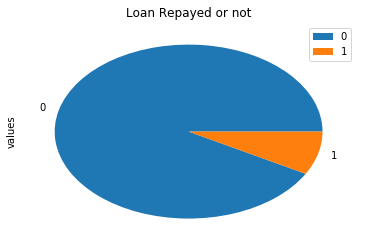

In [30]:
########### Data is balanced or imbalanced ############

temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
df.plot.pie(y='values', title='Loan Repayed or not')
plt.show()

In [31]:
######### checking out the Types of loan proposed by Credit Bureau

temp = application_train["NAME_CONTRACT_TYPE"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      #"name": "Types of Loans",
      #"hoverinfo":"label+percent+name",
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Types of loan",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Loan Types",
                "x": 0.17,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [32]:
########## What's the purpose of loans ?
temp1 = application_train["FLAG_OWN_CAR"].value_counts()
temp2 = application_train["FLAG_OWN_REALTY"].value_counts()

fig = {
  "data": [
    {
      "values": temp1.values,
      "labels": temp1.index,
      "domain": {"x": [0, .48]},
      "name": "Own Car",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    },
    {
      "values": temp2.values,
      "labels": temp2.index,
      "text":"Own Realty",
      "textposition":"inside",
      "domain": {"x": [.52, 1]},
      "name": "Own Reality",
      "hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    }],
  "layout": {
        "title":"Purpose of loan",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Own Car",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Own Realty",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
iplot(fig, filename='donut')

In [35]:
temp = application_train["NAME_INCOME_TYPE"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Income sources of Applicant",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Income Types",
                "x": 0.17,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')


In [36]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Applicant Civil Status",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Civil Status",
                "x": 0.17,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [42]:
temp = application_train["OCCUPATION_TYPE"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Occupation of Applicant",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Professional Status",
                "x": 0.17,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [43]:
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Applicant Education Level",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Education Type",
                "x": 0.17,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')


In [44]:

temp = application_train["NAME_HOUSING_TYPE"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, .48]},
      "hole": .7,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Applicant Housing Type",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "House Type",
                "x": 0.17,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [58]:
import plotly.plotly as py
    import plotly.graph_objs as go

temp = application_train["ORGANIZATION_TYPE"].value_counts()
trace0 = go.Bar(
    x=temp.index,
    y=temp.values,
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    xaxis=dict(tickangle=45),
    title='Types of Organizations who applied for loan',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='text-hover-bar')

In [ ]:
############## Exploration in terms of loan is repayed or not ##############

In [82]:
temp = application_train["NAME_INCOME_TYPE"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["NAME_INCOME_TYPE"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["NAME_INCOME_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = np.asarray(temp_y1) * (100/ temp.sum()),
    name='YES',
    marker=dict(
        color='rgb(158,0,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)
trace2 = go.Bar(
    x = temp.index,
    y = np.asarray(temp_y0) * (100/ temp.sum()), 
    name='NO',
    marker=dict(
        color='rgb(0,100,225)',
        line=dict(
            color='rgb(100,100,225)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(tickangle=45),
    title='Types of Organizations who applied for loan',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='text-hover-bar')

In [88]:
temp = application_train["NAME_FAMILY_STATUS"].value_counts()
#print(temp.values)
temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["NAME_FAMILY_STATUS"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["NAME_FAMILY_STATUS"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = np.asarray(temp_y1) * (100/ temp.sum()),
    name='YES',
    marker=dict(
        color='rgb(158,0,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)
trace2 = go.Bar(
    x = temp.index,
    y = np.asarray(temp_y0) * (100/ temp.sum()), 
    name='NO',
    marker=dict(
        color='rgb(0,100,225)',
        line=dict(
            color='rgb(100,100,225)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(tickangle=0),
    title="Percentage of Applicant Civil Status with respect to loan repayment",
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='text-hover-bar')

In [85]:
temp = application_train["OCCUPATION_TYPE"].value_counts()

temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["OCCUPATION_TYPE"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["OCCUPATION_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = np.asarray(temp_y1) * (100/ temp.sum()),
    name='YES',
    marker=dict(
        color='rgb(158,0,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)
trace2 = go.Bar(
    x = temp.index,
    y = np.asarray(temp_y0) * (100/ temp.sum()), 
    name='NO',
    marker=dict(
        color='rgb(0,100,225)',
        line=dict(
            color='rgb(100,100,225)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(tickangle=45),
    title="Percentage of Applicant OCCUPATION type with respect to loan repayment",
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='text-hover-bar')

In [87]:
temp = application_train["NAME_EDUCATION_TYPE"].value_counts()

temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["NAME_EDUCATION_TYPE"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["NAME_EDUCATION_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = np.asarray(temp_y1) * (100/ temp.sum()),
    name='YES',
    marker=dict(
        color='rgb(158,0,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)
trace2 = go.Bar(
    x = temp.index,
    y = np.asarray(temp_y0) * (100/ temp.sum()), 
    name='NO',
    marker=dict(
        color='rgb(0,100,225)',
        line=dict(
            color='rgb(100,100,225)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(tickangle=0),
    title="Percentage of Applicant Education level with respect to loan repayment",
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='text-hover-bar')

In [89]:
temp = application_train["NAME_HOUSING_TYPE"].value_counts()

temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["NAME_HOUSING_TYPE"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["NAME_HOUSING_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = np.asarray(temp_y1) * (100/ temp.sum()),
    name='YES',
    marker=dict(
        color='rgb(158,0,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)
trace2 = go.Bar(
    x = temp.index,
    y = np.asarray(temp_y0) * (100/ temp.sum()), 
    name='NO',
    marker=dict(
        color='rgb(0,100,225)',
        line=dict(
            color='rgb(100,100,225)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(tickangle=0),
    title="Percentage of Applicant Housing type with respect to loan repayment",
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='text-hover-bar')

In [94]:
temp = application_train["ORGANIZATION_TYPE"].value_counts()

temp_y0 = []
temp_y1 = []
for val in temp.index:
    temp_y1.append(np.sum(application_train["TARGET"][application_train["ORGANIZATION_TYPE"]==val] == 1))
    temp_y0.append(np.sum(application_train["TARGET"][application_train["ORGANIZATION_TYPE"]==val] == 0))    
trace1 = go.Bar(
    x = temp.index,
    y = np.asarray(temp_y1) * (100/ temp.sum()),
    name='YES',
    marker=dict(
        color='rgb(158,0,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)
trace2 = go.Bar(
    x = temp.index,
    y = np.asarray(temp_y0) * (100/ temp.sum()), 
    name='NO',
    marker=dict(
        color='rgb(0,100,225)',
        line=dict(
            color='rgb(100,100,225)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace1, trace2]
layout = go.Layout(
    xaxis=dict(tickangle=45),
    title="Percentage of Organizations type with respect to loan repayment",
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='text-hover-bar')

In [102]:
import plotly.plotly as py
import plotly.graph_objs as go

temp = application_train["ORGANIZATION_TYPE"].value_counts()
trace0 = go.Bar(
    x=temp.index,
    y=temp.values,
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    xaxis=dict(tickangle=45),
    title='Types of Organizations for whom Applicants work',
)

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='text-hover-bar')